In [39]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [40]:
df = pd.read_csv(r'CEAS_08.csv')

In [41]:
df.describe

<bound method NDFrame.describe of                                                   sender  \
0                       Young Esposito <Young@iworld.de>   
1                           Mok <ipline's1983@icable.ph>   
2      Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                     Michael Parker <ivqrnai@pobox.com>   
4      Gretchen Suggs <externalsep1@loanofficertool.com>   
...                                                  ...   
39149    CNN Alerts <charlene-detecton@btcmarketing.com>   
39150           CNN Alerts <idgetily1971@careplusnj.org>   
39151                   Abhijit Vyas <xpojhbz@gmail.com>   
39152              Joseph Brennan <vupzesm@columbia.edu>   
39153                Christian Heimes <wluhe@cheimes.de>   

                                             receiver  \
0                         user4@gvc.ceas-challenge.cc   
1                       user2.2@gvc.ceas-challenge.cc   
2                       user2.9@gvc.ceas-challenge.cc   
3      SpamAssass

In [42]:
df.head()

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1


In [43]:
df.shape

(39154, 7)

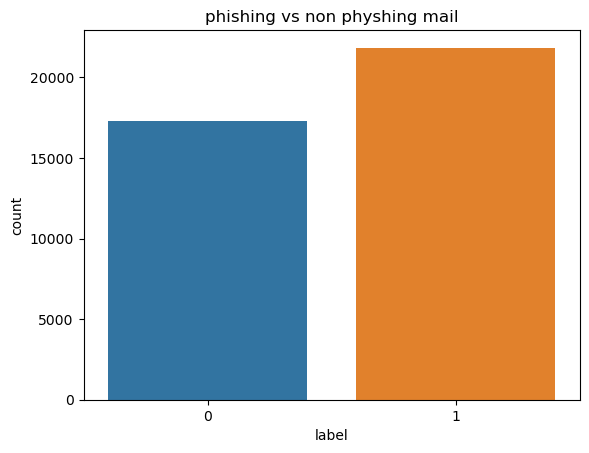

In [44]:
sns.countplot(x='label',data = df)
plt.title('phishing vs non physhing mail')
plt.show()

In [45]:
df.isnull().sum()

sender        0
receiver    462
date          0
subject      28
body          0
label         0
urls          0
dtype: int64

In [46]:
# Data preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text


In [47]:
df["body"] = df["body"].astype(str).apply(clean_text)

In [48]:
X=df['body']
y = df['label']

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 42)

In [50]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [51]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [52]:
y_predictmnb = mnb.predict(X_test_tfidf)

In [53]:
print('MultinomialNB')
print('Accuracy : ',accuracy_score(y_test,y_predictmnb))
print('Classification Report : ',classification_report(y_test,y_predictmnb))

MultinomialNB
Accuracy :  0.9736976506639428
Classification Report :                precision    recall  f1-score   support

           0       0.95      1.00      0.97      1746
           1       1.00      0.96      0.98      2170

    accuracy                           0.97      3916
   macro avg       0.97      0.98      0.97      3916
weighted avg       0.97      0.97      0.97      3916

